In [1]:
import pandas as pd
country_name = 'Azerbaijan'

In [2]:
inbound_tourism_df = pd.read_excel('/content/Inbound Tourism.xls')

In [3]:
inbound_tourism_df.head(10)

,Basic data and indicators,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Units,Notes,Series,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 33
0,AFGHANISTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Arrivals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Total arrivals,NaN,NaN,Thousands,NaN,NaN,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,NaN
3,NaN,NaN,NaN,Overnights visitors (tourists),NaN,Thousands,NaN,NaN,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,NaN
4,NaN,NaN,NaN,Same-day visitors (excursionists),NaN,Thousands,NaN,NaN,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,NaN
5,NaN,NaN,NaN,"of which, cruise passengers","of which, cruise passengers",Thousands,NaN,NaN,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,NaN
6,NaN,Arrivals by region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,Total,NaN,NaN,Thousands,NaN,NaN,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,NaN
8,NaN,NaN,NaN,Africa,NaN,Thousands,NaN,NaN,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,NaN
9,NaN,NaN,NaN,Americas,NaN,Thousands,NaN,NaN,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,NaN


The dataset is an aggregated excel sheet, displayed in a tree structure, we only need to get the records related to the sum total of inbound travelers, which is column C in excel sheet with value 'Total arrivals'.
First we need to impute the missing NAN values related to the countries and do sum renaming for columns to have them much more readable and consumable

In [4]:
class Aggregate_Imputer:

  def __init__(self,fields):
    self.fields = {}
    for f in fields:
      self.fields[f] = '' 
    self.names = fields   

  def do_impute(self, r):
    for k in self.fields:
      if not pd.isnull(r[k]):   
        self.fields[k] = r[k]
        r_names = self.names[self.names.index(k) + 1:]
        for flw in r_names:
          self.fields[flw] = ''
      r[k] = self.fields[k]
    return r
renamed_df = inbound_tourism_df.rename(columns={'Basic data and indicators':'country'})
renamed_df = renamed_df.apply(Aggregate_Imputer(['country','Unnamed: 1','Unnamed: 2','Unnamed: 3']).do_impute, axis=1)
# renamed_df = renamed_df[renamed_df['Unnamed: 2'] == 'Total arrivals']
# renamed_df = renamed_df[renamed_df['Unnamed: 3'] == 'Personal']
# renamed_df = renamed_df.drop(columns=['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Series','Notes','Units', 'Unnamed: 33'])
inbound_df = renamed_df.drop(columns=['Unnamed: 4','Series','Notes','Units','Unnamed: 33'])
inbound_df = inbound_df.dropna()
inbound_df = inbound_df[inbound_df['Unnamed: 1'] == 'Arrivals by mode of transport']
inbound_df = inbound_df[inbound_df['Unnamed: 3'] == ''].drop(columns=['Unnamed: 1','Unnamed: 2','Unnamed: 3'])

inbound_df.to_csv('/content/imputed_travels.csv')

In [5]:
country_inbound =inbound_df[inbound_df['country'] == country_name.upper()]
def rename_index(r):
  return 'year'
country_inbound = country_inbound.rename(index=rename_index)
country_inbound = country_inbound.drop(columns=['country']).transpose()
country_inbound = country_inbound.rename(columns={'year':'count'})
country_inbound.reset_index(inplace=True)
country_inbound = country_inbound.rename(columns={'index' : 'year'})
country_inbound = country_inbound[country_inbound['count'] != '..']
country_inbound

,year,count
1,1996,210
2,1997,306
3,1998,483
4,1999,602
5,2000,681
6,2001,767
7,2002,834
8,2003,1038
9,2004,1279
10,2005,1177


We need to handle different country names from F1 dataset and UN dataset, we only have the below countries in map to handle, other countries work find

In [6]:
country_map = {
    'UK':	'United Kingdom of Great Britain and Northern Ireland',
    'China':	'China, People\'s Republic of',
    'USA'	:'United States',
    'UAE'	:'United Arab Emirates',
    'Korea'	:'Democratic People\'s Republic of Korea',
    'Russia'	:'Russian Federation',
    'Vietnam':'Viet Nam'
}



---


Load all circuits in the world, taken from 
https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020/version/14

In [7]:
#Data Pipeline : Extract
circuits_df = pd.read_csv("/content/circuits.csv")
for key in country_map.keys():
  circuits_df.loc[circuits_df['country'] == key, 'country'] = country_map[key]



---


Get the racing years related to this country

In [8]:
circuitId = None
cid_df = circuits_df[circuits_df['country'] == country_name]['circuitId']
if len(cid_df) > 0:
  circuitId = cid_df.values[0]
print(country_name+" circuit id is " + str(circuitId))

Azerbaijan circuit id is 73


In [9]:
races_df = pd.read_csv('/content/races.csv')
races_df = races_df[races_df['circuitId'] == circuitId]
racing_years = races_df['year'].values
print("races hosted by this country: " + str(racing_years))

races hosted by this country: [2016 2017 2018 2019 2021 2022]


In [10]:
# Multiple Bar Graph
import matplotlib.pyplot as plt
import numpy as np


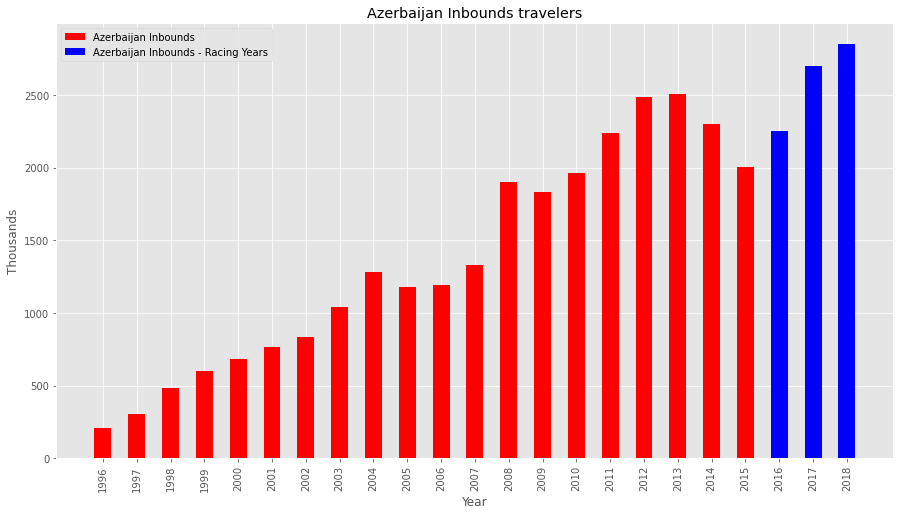

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))

width=0.5

in_racing_years = country_inbound[country_inbound['year'].isin(racing_years)]
not_racing_years = country_inbound[~country_inbound['year'].isin(racing_years)]

# Multiple Bar Graph
x_labels =country_inbound['year']
# first location for first bar in x-axis


plt.bar(not_racing_years['year'], not_racing_years['count'], width, label=(country_name + " Inbounds"), color='red')
plt.bar(in_racing_years['year'], in_racing_years['count'], width, label=(country_name + " Inbounds - Racing Years"), color='blue')


plt.title(country_name + " Inbounds travelers")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Thousands")
plt.xticks(x_labels)
plt.legend()
plt.show()
